In [1]:
#数据分析模块
import pandas as pd
import numpy as np
import random as rnd
from datetime import datetime
import time
import math
#可视化模块
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 
%matplotlib inline


#模型训练模块
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#导入数据
df = pd.read_excel('MCM_NFLIS_Data.xlsx',sheet_name='Data')

In [3]:
df.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
0,2010,VA,ACCOMACK,51,1,51001,Propoxyphene,1,84,41462
1,2010,OH,ADAMS,39,1,39001,Morphine,9,527,70999
2,2010,PA,ADAMS,42,1,42001,Methadone,2,334,89981
3,2010,VA,ALEXANDRIA CITY,51,510,51510,Heroin,5,427,41462
4,2010,PA,ALLEGHENY,42,3,42003,Hydromorphone,5,8500,89981


In [4]:
g = df.groupby('State')

In [5]:
KY_yao = list(g.get_group('KY').groupby('SubstanceName'))
PA_yao = list(g.get_group('PA').groupby('SubstanceName'))
OH_yao = list(g.get_group('OH').groupby('SubstanceName'))
VA_yao = list(g.get_group('VA').groupby('SubstanceName'))
WV_yao = list(g.get_group('WV').groupby('SubstanceName'))

In [6]:
# 判断是否为新药
def getNew(zhou):
    List = list()
    all = 0
    print('State:'+zhou)
    print('---------------------------------------------------------')
    for Z, dt in list(df.groupby('State').get_group(zhou).groupby('SubstanceName')):
        minNian = 9999
        for i in range(0,len(dt['YYYY'].values)):
            if(dt['YYYY'].values[i]<minNian):
                minNian = dt['YYYY'].values[i]
        # 2010年后出现
        if minNian > 2010:
            # 最早的年份出现flag个县城
            flag = 0
            for j in range(0,len(dt['YYYY'].index.values)):
                if dt['YYYY'].values[j]==minNian:
                    flag += 1
            # 只有一个县城的
            if flag == 1:
                all+=1
                print('SubstanceName: '+Z)
                print('FIPS_Combined:'+str(dt['FIPS_Combined'].values[j])+"  Year:"+ str(dt['YYYY'].values[j])
                        +"  County:"+str(dt['COUNTY'].values[j]) +"  DrugReports:"+str(dt['DrugReports'].values[j]))
                print('---------------------------------------------------------')
                List.append(Z)
    print('all:'+str(all)+'\n\n')
    return List

In [7]:
# 第一次找新药
name = ['KY','VA','OH','WV','PA']
One_KY = getNew(name[0])
One_VA = getNew(name[1])
One_OH = getNew(name[2])
One_WV = getNew(name[3])
One_PA = getNew(name[4])

State:KY
---------------------------------------------------------
SubstanceName: ANPP
FIPS_Combined:21173  Year:2017  County:MONTGOMERY  DrugReports:4
---------------------------------------------------------
SubstanceName: Acryl fentanyl
FIPS_Combined:21223  Year:2017  County:TRIMBLE  DrugReports:1
---------------------------------------------------------
SubstanceName: Cyclopentyl fentanyl
FIPS_Combined:21067  Year:2017  County:FAYETTE  DrugReports:1
---------------------------------------------------------
SubstanceName: Cyclopropyl fentanyl
FIPS_Combined:21209  Year:2017  County:SCOTT  DrugReports:1
---------------------------------------------------------
SubstanceName: Desmethylprodine 
FIPS_Combined:21111  Year:2011  County:JEFFERSON  DrugReports:5
---------------------------------------------------------
SubstanceName: Dihydrocodeine
FIPS_Combined:21073  Year:2011  County:FRANKLIN  DrugReports:1
---------------------------------------------------------
SubstanceName: Fluorofen

In [8]:
# 找到第一次出现并且同年多个的药
def getNewOfFist(zhou):
    List = list()
    # 某个州的所有病毒
    all = 0
    for Z, dt in list(df.groupby('State').get_group(zhou).groupby('SubstanceName')):
        minNian = 9999
        for i in range(0,len(dt['YYYY'].values)):
            if(dt['YYYY'].values[i]<minNian):
                minNian = dt['YYYY'].values[i]
        if minNian > 2010:
            flag = 0
            for j in range(0,len(dt['YYYY'].index.values)):
                if dt['YYYY'].values[j]==minNian:
                    flag += 1
            # 同年有多个
            if flag>1:
                print('SubstanceName: '+Z)
                for j in range(0,len(dt['YYYY'].index.values)):
                    if dt['YYYY'].values[j] == minNian:
                        print('FIPS_Combined:'+str(dt['FIPS_Combined'].values[j])+'  Year:'+ str(dt['YYYY'].values[j])
                              +'  County:'+str(dt['COUNTY'].values[j]) +'  DrugReports:'+str(dt['DrugReports'].values[j])
                              +'  Drug proportion:'
                              +'%.2f' % (dt['TotalDrugReportsCounty'].values[j]/dt['TotalDrugReportsState'].values[j]*100) +'%')
                print('--------------------------------------------------------------------------------------------------------------')
                all+=1
                List.append(Z)
    print('总数:'+str(all)+'\n\n')
#        List.append(dt['YYYY'].values)
    return List

In [9]:
# 2010年后第一年有多个年的药
Two_KY = getNewOfFist(name[0])
Two_VA = getNewOfFist(name[1])
Two_OH = getNewOfFist(name[2])
Two_WV = getNewOfFist(name[3])
Two_PA = getNewOfFist(name[4])

SubstanceName: 4-Fluoroisobutyryl fentanyl
FIPS_Combined:21151  Year:2017  County:MADISON  DrugReports:2  Drug proportion:2.26%
FIPS_Combined:21173  Year:2017  County:MONTGOMERY  DrugReports:1  Drug proportion:0.83%
--------------------------------------------------------------------------------------------------------------
SubstanceName: Acetyl fentanyl
FIPS_Combined:21023  Year:2015  County:BRACKEN  DrugReports:1  Drug proportion:0.07%
FIPS_Combined:21019  Year:2015  County:BOYD  DrugReports:2  Drug proportion:1.69%
FIPS_Combined:21043  Year:2015  County:CARTER  DrugReports:1  Drug proportion:0.82%
FIPS_Combined:21067  Year:2015  County:FAYETTE  DrugReports:5  Drug proportion:6.44%
FIPS_Combined:21151  Year:2015  County:MADISON  DrugReports:11  Drug proportion:2.36%
FIPS_Combined:21117  Year:2015  County:KENTON  DrugReports:1  Drug proportion:4.35%
--------------------------------------------------------------------------------------------------------------
SubstanceName: Butyryl fe

SubstanceName: 3-Methylfentanyl
FIPS_Combined:42007  Year:2016  County:BEAVER  DrugReports:7  Drug proportion:1.03%
FIPS_Combined:42021  Year:2016  County:CAMBRIA  DrugReports:1  Drug proportion:1.00%
FIPS_Combined:42025  Year:2016  County:CARBON  DrugReports:4  Drug proportion:0.29%
FIPS_Combined:42029  Year:2016  County:CHESTER  DrugReports:8  Drug proportion:2.10%
FIPS_Combined:42045  Year:2016  County:DELAWARE  DrugReports:67  Drug proportion:7.41%
FIPS_Combined:42011  Year:2016  County:BERKS  DrugReports:3  Drug proportion:3.84%
FIPS_Combined:42019  Year:2016  County:BUTLER  DrugReports:7  Drug proportion:0.55%
FIPS_Combined:42055  Year:2016  County:FRANKLIN  DrugReports:2  Drug proportion:0.56%
FIPS_Combined:42043  Year:2016  County:DAUPHIN  DrugReports:1  Drug proportion:3.01%
FIPS_Combined:42079  Year:2016  County:LUZERNE  DrugReports:1  Drug proportion:3.23%
FIPS_Combined:42035  Year:2016  County:CLINTON  DrugReports:1  Drug proportion:0.21%
FIPS_Combined:42071  Year:2016  Cou

In [10]:
Two_KY

['4-Fluoroisobutyryl fentanyl',
 'Acetyl fentanyl',
 'Butyryl fentanyl',
 'Carfentanil',
 'Fluoroisobutyryl fentanyl',
 'Furanyl fentanyl',
 'Methoxyacetyl fentanyl',
 'U-47700']

In [11]:
f = open('经纬度.csv')
JD = pd.read_csv(f)
f = open('VA_LOST(1).csv')
VA_LOST = pd.read_csv(f)

In [12]:
JD.head()

,type,latitude,longitude,name,city,county,state,country,fips_combined,fips_county,fips_state
0,W,40.62528,-80.12528,"Allegheny County, PA",Allegheny County,ALLEGHENY,PA,us,42003,3,42
1,W,37.00222,-79.86667,"Franklin County, VA",Franklin County,FRANKLIN,VA,us,51067,67,51
2,W,40.81667,-82.26667,"Ashland County, OH",Ashland County,ASHLAND,OH,us,39005,5,39
3,W,40.76667,-84.08333,"Allen County, OH",Allen County,ALLEN,OH,us,39003,3,39
4,W,40.00028,-80.96667,"Belmont County, OH",Belmont County,BELMONT,OH,us,39013,13,39


In [13]:
VA_LOST.head()

,Unnamed: 0,fips_combined,Unnamed: 2,Unnamed: 3
0,ALEXANDRIA,51510,38.799196,-77.097739
1,BEDFORD,51515,37.339184,-79.528390
2,BRISTOL,51520,36.761613,-81.968712
3,BUENA VISTA,51530,37.740780,-79.350380
4,CHARLOTTESVILLE,51540,38.040101,-78.485066


In [14]:
KY = df.groupby('State').get_group('KY')
PA = df.groupby('State').get_group('PA')
OH = df.groupby('State').get_group('OH')
VA = df.groupby('State').get_group('VA')
WV = df.groupby('State').get_group('WV')
PA.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
2,2010,PA,ADAMS,42,1,42001,Methadone,2,334,89981
4,2010,PA,ALLEGHENY,42,3,42003,Hydromorphone,5,8500,89981
9,2010,PA,ARMSTRONG,42,5,42005,Dextropropoxyphene,1,344,89981
23,2010,PA,BEDFORD,42,9,42009,Hydrocodone,3,150,89981
28,2010,PA,BERKS,42,11,42011,Morphine,5,2146,89981


In [15]:
# 分州统计县
#pd.DataFrame(PA['COUNTY'].value_counts()).to_csv('PA.csv')
#pd.DataFrame(KY['COUNTY'].value_counts()).to_csv('KY.csv')
#pd.DataFrame(OH['COUNTY'].value_counts()).to_csv('OH.csv')
#pd.DataFrame(VA['COUNTY'].value_counts()).to_csv('VA.csv')
#pd.DataFrame(WV['COUNTY'].value_counts()).to_csv('WV.csv')

In [16]:
# 单独处理VA缺失的县
def FindVA(data):
    add = 0
    f=0
    Cou = []
    Num = []
    Index=[]
    for i in range(0,data.shape[0]):
        flag = 1
        for j in range(0,JD.shape[0]):
            if data.iloc[i,5]==JD.iloc[j,8]: 
                #lat.append(JD.iloc[j,1])
                #lon.append(JD.iloc[j,2])
                flag=0
                add+=1
                break
        if flag==1:
            Index.append(data.index[i])
            Cou.append(data.iloc[i,2])
            Num.append(data.iloc[i,5])
       #     print(data.iloc[i,2]+"  "+str(data.iloc[i,5]))
            f += 1
    #print(f)
    #print(add)
    return Cou,Num,Index
# 统计VA确实经纬度的县
#cou,num,idx = FindVA(VA)
#VA_Lost = pd.DataFrame(index=idx)
#VA_Lost['COUNTY'] = cou
#VA_Lost['fips_combined'] = num
# 删除重复的行并保留首个
# VA_Lost.drop_duplicates(subset=['fips_combined'], keep='first').to_csv('VA_LOST.csv')

In [17]:
from math import radians, cos, sin, asin, sqrt 
#计算两点间距离-m
def geodistance(lng1,lat1,lng2,lat2):
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    dis=2*asin(sqrt(a))*6371*1000
    return dis
# 处理经纬度
def APPEND(data):
    add = 0
    f=0
    lat = []
    lon = []
    for i in range(0,data.shape[0]):
        flag = 1
        for j in range(0,JD.shape[0]):
            if data.iloc[i,5]==JD.iloc[j,8]: # 县城编号相同
                lat.append(JD.iloc[j,1])
                lon.append(JD.iloc[j,2])
                flag=0
                add+=1
                break
        # VA找不到的
        if flag==1:
            for j in range(0,VA_LOST.shape[0]):
                if data.iloc[i,5]==VA_LOST.iloc[j,1]:
                    lat.append(JD.iloc[j,1])
                    lon.append(JD.iloc[j,2])
                    flag=0
                    add+=1
                    break
    #print(f)
    data['lat'] = lat
    data['lon'] = lon
    data['Rat'] = data['TotalDrugReportsCounty']/data['TotalDrugReportsState']
    #print(add)
#获得要处理的药物的DataFrame,每种药物分开
def getPD(data,YAO):
    pdList = []
    for yao in YAO:
  #      print(yao)
        List = []
        for i in range(0,data.shape[0]):
            if yao == data.iloc[i,6]:
                List.append(i)
        pdList.append(data.iloc[List])
    return pdList

# 处理DataFrame列表，算总距离和，贡献
def getDist(g):
    for dt in g:
        List = []
        for i in range(0,dt.shape[0]):
            disSum = 0
            for j in range(0,dt.shape[0]):
                if i != j:
                    lat1 = dt.iloc[i,10]
                    lon1 = dt.iloc[i,11]
                    lat2 = dt.iloc[j,10]
                    lon2 = dt.iloc[j,11]
                    disSum += geodistance(lat1,lon1,lat2,lon2)
            List.append(disSum)
        #print(List)
        dt['DistSum']=List
        dt['Rat'] = df['TotalDrugReportsCounty']/dt['TotalDrugReportsState']
        dt['Score'] = dt['Rat']/dt['DistSum']*dt['DrugReports']*1e8

## 打印信息,并返回阈值
def PrintANS(g):
    print('Stata:'+g[0].iloc[0,1])
    Limit = 0
    print('Year    FIPS_Combined'+'   SubstanceName'+'  COUNTY'+'   Score')
    print('-----------------------------------------------------------------')
    for dt in g:
        mx = -1.0
        ans = -1
        # 算最早年
        minYear = 2020
        for i in range(0,dt.shape[0]):
            if(dt.iloc[i,0]<minYear):
                minYear = dt.iloc[i,0]
        for i in range(0,dt.shape[0]):
            if dt.iloc[i,14]>mx and dt.iloc[i,0]==minYear:
                mx=dt.iloc[i,14]
                ans = i 
        print(str(dt.iloc[ans,0])+'   '+str(dt.iloc[ans,5])+'   '+dt.iloc[ans,6]+'   '+dt.iloc[ans,2]+'   '+str(mx)+'   '+str(dt['DrugReports'].values[ans]))
        Limit += mx
    print('-----------------------------------------------------------------')
    print(len(g))
    return Limit/len(g)
def SloveOneState(DATA,YAO):
    APPEND(DATA)
    g = getPD(DATA,YAO)
    getDist(g)
    Solve_YAO = PrintANS(g)
    return g,Solve_YAO

In [18]:
g_KY,Limit_KY = SloveOneState(KY,Two_KY)
g_PA,Limit_PA = SloveOneState(PA,Two_PA)
g_VA,Limit_VA = SloveOneState(VA,Two_VA)
g_WV,Limit_WV = SloveOneState(WV,Two_WV)
g_OH,Limit_OH = SloveOneState(OH,Two_OH)
print('-----------------------------------------------------------------')
print('KY阈值:'+str(Limit_KY))
print('PA阈值:'+str(Limit_PA))
print('WV阈值:'+str(Limit_WV))
print('OH阈值:'+str(Limit_OH))
print('VA阈值:'+str(Limit_VA))

D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

Stata:KY
Year    FIPS_Combined   SubstanceName  COUNTY   Score
-----------------------------------------------------------------
2017   21151   4-Fluoroisobutyryl fentanyl   MADISON   105.5890355464423   2
2015   21067   Acetyl fentanyl   FAYETTE   61.24321005028016   5
2017   21067   Butyryl fentanyl   FAYETTE   103.52662771270774   5
2016   21117   Carfentanil   KENTON   20.089550499634043   9
2017   21185   Fluoroisobutyryl fentanyl   OLDHAM   8.225896759045632   3
2016   21111   Furanyl fentanyl   JEFFERSON   60.78495947043388   21
2017   21067   Methoxyacetyl fentanyl   FAYETTE   81.79603847354701   5
2016   21111   U-47700   JEFFERSON   8.661262892123725   2
-----------------------------------------------------------------
8
Stata:PA
Year    FIPS_Combined   SubstanceName  COUNTY   Score
-----------------------------------------------------------------
2016   42101   3-Methylfentanyl   PHILADELPHIA   79.93411066458124   26
2016   42043   4-Fluoroisobutyryl fentanyl   DAUPHIN   6.4

In [19]:
# 举个例子画图
Eg1 = g_KY[3].head(11)
from pyecharts import Geo, Map, Line
# 面积折线图
line1 =Line("Scores of each county substances")
attr = Eg1['COUNTY']
v1 = Eg1['Score']
line1.add("Carfentanil", attr, v1, is_fill=True,mark_point_text='JEFFERSON',line_opacity=0.2,   area_opacity=0.4, symbol=None, mark_point=['max'])
line1

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\ruanjian\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [20]:
# 删除掉特定的（已经处理过的）行
unKY=KY[~(KY['SubstanceName'].isin(One_KY)|KY['SubstanceName'].isin(Two_KY))]
unPA=PA[~(PA['SubstanceName'].isin(One_PA)|PA['SubstanceName'].isin(Two_PA))]
unVA=VA[~(VA['SubstanceName'].isin(One_VA)|VA['SubstanceName'].isin(Two_VA))]
unWV=WV[~(WV['SubstanceName'].isin(One_WV)|WV['SubstanceName'].isin(Two_WV))]
unOH=OH[~(OH['SubstanceName'].isin(One_OH)|OH['SubstanceName'].isin(Two_OH))]

In [23]:
ALLYAO = []
ALLNIAN = []
ALLDIS = []
ALLSUB = []
ALLRAT = []
ALLSCORE = []
def getScore(data):
    APPEND(data)
    mp = {}
    g = list(data.groupby('SubstanceName'))
    for name,dt in g:# 按药分类
        YAO = {}
        for year, newdt in list(dt.groupby('YYYY')):    # 按年份分类
            List = []
            for i in range(0,newdt.shape[0]):
                ALLYAO.append(name)
                ALLNIAN.append(year)
                disSum = 0
                for j in range(0,newdt.shape[0]):
                    if i != j:
                        lat1 = newdt.iloc[i,10]
                        lon1 = newdt.iloc[i,11]
                        lat2 = newdt.iloc[j,10]
                        lon2 = newdt.iloc[j,11]
                        disSum += geodistance(lat1,lon1,lat2,lon2)
                List.append(disSum)
                ALLDIS.append(disSum)
            newdt['DistSum']=List
            newdt['Rat'] = newdt['TotalDrugReportsCounty']/newdt['TotalDrugReportsState']
            newdt['Score'] = newdt['Rat']/newdt['DistSum']*newdt['DrugReports']*1e8
            for val in newdt['Rat'].values:
                ALLRAT.append(val)
            for val in newdt['Score'].values:
                ALLSCORE.append(val)
            #print(newdt.shape)
            YAO.update({year:newdt})
        mp.update({name:YAO})
    return mp

In [24]:
mp_KY = getScore(unKY)
mp_PA = getScore(unPA)
mp_VA = getScore(unVA)
mp_WV = getScore(unWV)
mp_OH = getScore(unOH)

D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [25]:
# 打印出在2010年出现过一次的
def one2010(mp,Limit):
    List = []
    print('Year    FIPS_Combined'+'   SubstanceName'+'  COUNTY    Score')
    print('-----------------------------------------------------------------')
    for key in mp.keys():
        if  mp[key][2010]['Score'].max()<=Limit or  mp[key][2010]['Score'].max()==float('inf'):
            for i in range(0,mp[key][2010].shape[0]):
                if mp[key][2010].iloc[i,14]==mp[key][2010]['Score'].max():
                    print(str(mp[key][2010]['YYYY'].values[i]) + '    '+str(mp[key][2010]['FIPS_Combined'].values[i])
                         +'             '+mp[key][2010]['SubstanceName'].values[i]+'   '+mp[key][2010]['COUNTY'].values[i]+'   '+str(mp[key][2010].iloc[i,14]))
                    List.append(mp[key][2010]['SubstanceName'].values[0])
                    break
    print('-----------------------------------------------------------------\n\n')
    return List
print('KY')
Three_KY = one2010(mp_KY,Limit_KY)
print('VA')
Three_VA = one2010(mp_VA,Limit_VA)
print('PA')
Three_PA = one2010(mp_PA,Limit_PA)
print('WV')
Three_WV = one2010(mp_WV,Limit_WV)
print('OH')
Three_OH = one2010(mp_OH,Limit_OH)

KY
Year    FIPS_Combined   SubstanceName  COUNTY    Score
-----------------------------------------------------------------
2010    21111             Buprenorphine   JEFFERSON   53.04866620259898
2010    21111             Fentanyl   JEFFERSON   22.974474633864254
2010    21111             Hydromorphone   JEFFERSON   39.87975133014153
2010    21009             Meperidine   BARREN   inf
2010    21111             Morphine   JEFFERSON   37.018344595169935
2010    21227             Thebaine   WARREN   inf
-----------------------------------------------------------------


VA
Year    FIPS_Combined   SubstanceName  COUNTY    Score
-----------------------------------------------------------------
2010    51059             Buprenorphine   FAIRFAX   7.334187705198344
2010    51059             Codeine   FAIRFAX   3.2997906482434383
2010    51059             Fentanyl   FAIRFAX   2.576054968653964
2010    51760             Hydrocodone   RICHMOND   10.021495112752678
2010    51059             Hydrom

In [26]:
print(len(Three_KY))
print(len(Three_VA))
print(len(Three_PA))
print(len(Three_WV))
print(len(Three_OH))

6
15
12
11
15


In [27]:
print(len(mp_KY.values()))
print(len(mp_VA.values()))
print(len(mp_PA.values()))
print(len(mp_WV.values()))
print(len(mp_OH.values()))

17
17
20
16
16


In [28]:
print(len(Three_KY))
print(len(Three_VA))
print(len(Three_PA))
print(len(Three_WV))
print(len(Three_OH))

6
15
12
11
15


In [29]:
# 2010最多的
def One2010(mp,Limit):
    print('Year    FIPS_Combined'+'   SubstanceName'+'  COUNTY    Score')
    print('-----------------------------------------------------------------')
    for key in mp.keys():
        if mp[key][2010]['Score'].max()>Limit and mp[key][2010]['Score'].max()!=float('inf'):
            for i in range(0,mp[key][2010].shape[0]):
                if mp[key][2010].iloc[i,14]==mp[key][2010]['Score'].max():
                    print(str(mp[key][2010]['YYYY'].values[i]) + '    '+str(mp[key][2010]['FIPS_Combined'].values[i])
                         +'             '+mp[key][2010]['SubstanceName'].values[i]+'   '+mp[key][2010]['COUNTY'].values[i]+'   '+str(mp[key][2010].iloc[i,14]))
                    List.append(mp[key][2010]['SubstanceName'].values[0])
                    break
    print('-----------------------------------------------------------------')
    return List
print('KY')
#Three_KY = One2010(mp_KY,Limit_KY)
print('VA')
#Three_VA = One2010(mp_VA,Limit_VA)
print('PA')
#Three_PA = One2010(mp_PA,Limit_PA)
print('WV')
#Three_WV = One2010(mp_WV,Limit_WV)
print('OH')
#Three_OH = One2010(mp_OH,Limit_OH)

KY
Year    FIPS_Combined   SubstanceName  COUNTY    Score
-----------------------------------------------------------------
2010    21111             Codeine   JEFFERSON   129.1495051888705


NameError: name 'List' is not defined

In [31]:
line2 =Line('KY')
for key in mp_KY.keys():
    if mp_KY[key][2010]['Score'].max()>Limit_KY and mp_KY[key][2010]['Score'].max()!=float('inf'):
        attr = mp_KY[key][2010]['COUNTY']
        v1 = mp_KY[key][2010]['Score'].astype('int')
        line2.add(mp_KY[key][2010]['SubstanceName'].values[0],attr,v1, xaxis_interval =2,
                  is_fill=True,line_opacity=0.2,area_opacity=0.4, symbol=None,is_smooth=True,xaxis_label_textsize=9)
        line2.add(mp_KY[key][2010]['SubstanceName'].values[0],attr,[Limit_KY for i in range(0,len(attr))],
                  xaxis_label_textsize=9,xaxis_interval =2,
                  xaxis_name='County',yaxis_name='Score',yaxis_name_gap=40,xaxis_name_gap=35)
line2

In [32]:
line2 =Line('VA')
for key in mp_VA.keys():
    if mp_VA[key][2010]['Score'].max()>Limit_VA and mp_VA[key][2010]['Score'].max()!=float('inf'):
        attr = mp_VA[key][2010]['COUNTY']
        v1 = mp_VA[key][2010]['Score'].astype('int')
        line2.add(mp_VA[key][2010]['SubstanceName'].values[0],attr,v1, xaxis_interval =2,
                  is_fill=True,line_opacity=0.2,area_opacity=0.4, symbol=None,is_smooth=True,xaxis_label_textsize=9)
        line2.add(mp_VA[key][2010]['SubstanceName'].values[0],attr,[Limit_VA for i in range(0,len(attr))],
                  xaxis_label_textsize=9,xaxis_interval =2,
                  xaxis_name='County',yaxis_name='Score',yaxis_name_gap=40,xaxis_name_gap=35)
line2

In [33]:
def solve2010(data,Limit):
    print('------------------------------------------------------------')
    print(data.iloc[0,1]+'     '+'Limit:'+str(Limit))
    print('------------------------------------------------------------')
    print('SubstanceName            COUNTY              Score')
    all = 0
    sum = 0
    for name,dt in list(data.groupby('YYYY').get_group(2010).groupby('SubstanceName')):
        mx = -1
        idx = -1
        sum+=1
        for i in range(0,dt.shape[0]):
            if dt.iloc[i,14]>mx:
                mx = dt.iloc[i,14]
                idx = i
        #print(mx)
        if mx<Limit and mx!=-1:
            print(name+'      '+dt.iloc[idx,2]+'       '+str(dt.iloc[idx,14]))
            all+=1
    print('sum:'+str(sum)+'        all:'+str(all))

In [34]:
unKY.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,lat,lon,Rat
5,2010,KY,ALLEN,21,3,21003,Oxycodone,15,168,29588,36.75056,-86.20000,0.005678
6,2010,KY,ALLEN,21,3,21003,Oxymorphone,1,168,29588,36.75056,-86.20000,0.005678
20,2010,KY,BARREN,21,9,21009,Morphine,3,383,29588,36.95000,-85.95000,0.012944
21,2010,KY,BATH,21,11,21011,Buprenorphine,1,81,29588,38.15000,-83.75056,0.002738
22,2010,KY,BATH,21,11,21011,Hydrocodone,7,81,29588,38.15000,-83.75056,0.002738


In [35]:
KY.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,lat,lon,Rat
5,2010,KY,ALLEN,21,3,21003,Oxycodone,15,168,29588,36.75056,-86.20000,0.005678
6,2010,KY,ALLEN,21,3,21003,Oxymorphone,1,168,29588,36.75056,-86.20000,0.005678
20,2010,KY,BARREN,21,9,21009,Morphine,3,383,29588,36.95000,-85.95000,0.012944
21,2010,KY,BATH,21,11,21011,Buprenorphine,1,81,29588,38.15000,-83.75056,0.002738
22,2010,KY,BATH,21,11,21011,Hydrocodone,7,81,29588,38.15000,-83.75056,0.002738


In [36]:
TU_KY = pd.read_excel('第一题.xlsx',sheet_name='KY')
TU_PA = pd.read_excel('第一题.xlsx',sheet_name='PA')
TU_WV = pd.read_excel('第一题.xlsx',sheet_name='wv')
TU_VA = pd.read_excel('第一题.xlsx',sheet_name='va')
TU_OH = pd.read_excel('第一题.xlsx',sheet_name='oh')

In [37]:
TU_WV['Year'].value_counts().index

Int64Index([2017, 2016, 2015, 2013, 2012, 2011], dtype='int64')

In [38]:
TU_WV['Year'].value_counts().sort_index().index.values

array([2011, 2012, 2013, 2015, 2016, 2017], dtype=int64)

In [39]:
from pyecharts import Bar, Line, Overlap
idx1 = TU_KY['Year'].value_counts().index
val1 = TU_KY['Year'].value_counts().values
idx2 = TU_PA['Year'].value_counts().index
val2 = TU_PA['Year'].value_counts().values
idx3 = TU_WV['Year'].value_counts().index
val3 = TU_WV['Year'].value_counts().values
idx4 = TU_VA['Year'].value_counts().index
val4 = TU_VA['Year'].value_counts().values
idx5 = TU_OH['Year'].value_counts().index
val5 = TU_OH['Year'].value_counts().values
bar = Bar("The realtionship between new substance and time",title_pos='center',title_top=25)
bar.add('KY', idx1, val1)
bar.add('PA', idx2, val2)
bar.add('WV', idx3, val3)
bar.add('VA', idx4, val4)
bar.add('OH', idx5, val5,is_xaxis_inverse=True,xaxis_name='Year',yaxis_name='The number of the type of new substance')
bar

In [40]:
TU_KY2 = pd.read_excel('第一题2.xlsx',sheet_name='KY')
TU_PA2 = pd.read_excel('第一题2.xlsx',sheet_name='PA')
TU_WV2 = pd.read_excel('第一题2.xlsx',sheet_name='wv')
TU_VA2 = pd.read_excel('第一题2.xlsx',sheet_name='va')
TU_OH2 = pd.read_excel('第一题2.xlsx',sheet_name='oh')

In [41]:
TU_OH2.head()

,Year,FIPS_Combined,SubstanceName,County,DrugReports
0,2017,39035,U-51754,CUYAHOGA,7.0
1,2016,39035,p-Fluorofentanyl,CUYAHOGA,6.0
2,2016,39049,p-Fluorobutyryl fentanyl,FRANKLIN,1.0
3,2017,39061,Isobutyryl fentanyl,HAMILTON,1.0
4,2016,39077,Valeryl fentanyl,HURON,2.0


In [42]:
from pyecharts import Bar, Line, Overlap
idx1 = TU_KY2['County'].value_counts().index
val1 = TU_KY2['County'].value_counts().values
idx2 = TU_PA2['County'].value_counts().index
val2 = TU_PA2['County'].value_counts().values
idx3 = TU_WV2['County'].value_counts().index
val3 = TU_WV2['County'].value_counts().values
idx4 = TU_VA2['County'].value_counts().index
val4 = TU_VA2['County'].value_counts().values
idx5 = TU_OH2['County'].value_counts().index
val5 = TU_OH2['County'].value_counts().values
bar = Bar("The realtionship between new substance and time",title_pos='center',title_top=25)
bar.add('KY', idx1, val1)
bar.add('PA', idx2, val2)
bar.add('WV', idx3, val3)
bar.add('VA', idx4, val4)
bar.add('OH', idx5, val5,is_xaxis_inverse=True,xaxis_name='County',yaxis_name='')
bar

In [43]:
from pyecharts import Pie  #导包
pie = Pie("State: KY",title_pos='center',width=900)
pie.add("KY1",idx1,val1,is_random=True,radius=[30,75],rosetype='area',is_legend_show=False,is_label_show='True')
pie

In [44]:
from pyecharts import Pie  #导包
pie = Pie("State: PA",title_pos='center',width=900)
pie.add("PA",idx2,val2,is_random=True,radius=[30,75],rosetype='area',is_legend_show=False,is_label_show='True')
pie

In [45]:
from pyecharts import Pie  #导包
pie = Pie("State: WV",title_pos='center',width=900)
pie.add("WV",idx3,val3,is_random=True,radius=[30,75],rosetype='area',is_legend_show=False,is_label_show='True')
pie

In [46]:
from pyecharts import Pie  #导包
pie = Pie("State: VA",title_pos='center',width=900)
pie.add("VA",idx4,val4,is_random=True,radius=[30,75],rosetype='area',is_legend_show=False,is_label_show='True')
pie

In [47]:
from pyecharts import Pie  #导包
pie = Pie("State: OH",title_pos='center',width=900)
pie.add("OH",idx5,val5,is_random=True,radius=[30,75],rosetype='area',is_legend_show=False,is_label_show='True')
pie

In [48]:
count_g = list(df.groupby('FIPS_Combined'))

In [49]:
COU = []
ALL = []
jindu = []
weidu = []
for name, dt in count_g:
    COU.append(name)
    ALL.append(dt['DrugReports'].mean())
    flag = 1
    for i in range(0,JD.shape[0]):
        if name==JD.iloc[i,8]:
            jindu.append(JD.iloc[i,1])
            weidu.append(JD.iloc[i,2])
            flag = 0
    if flag == 1:
        for i in range(0,VA_LOST.shape[0]):
            if name==VA_LOST.iloc[i,1]:
                jindu.append(VA_LOST.iloc[i,2])
                weidu.append(VA_LOST.iloc[i,3])
                flag = 0

In [50]:
print(len(COU))
print(len(ALL))
print(len(jindu))
print(len(weidu))

461
461
461
461


In [51]:
ALL

[4.486486486486487,
 6.175,
 5.486486486486487,
 1.1428571428571428,
 7.318181818181818,
 7.571428571428571,
 25.14666666666667,
 26.76388888888889,
 6.923076923076923,
 24.88,
 11.958333333333334,
 5.032258064516129,
 7.8,
 2.3333333333333335,
 13.359375,
 2.4285714285714284,
 4.125,
 3.8421052631578947,
 47.0,
 1.6666666666666667,
 11.236363636363636,
 16.904761904761905,
 5.488372093023256,
 6.678571428571429,
 20.0,
 15.465116279069768,
 3.8857142857142857,
 3.0952380952380953,
 2.6176470588235294,
 6.241935483870968,
 3.8214285714285716,
 7.0,
 8.484848484848484,
 49.728971962616825,
 7.0,
 15.647887323943662,
 15.08695652173913,
 3.6785714285714284,
 4.714285714285714,
 4.828571428571428,
 8.915254237288135,
 6.270833333333333,
 4.914893617021277,
 2.4545454545454546,
 11.411764705882353,
 1.75,
 10.384615384615385,
 28.985507246376812,
 11.8,
 2.3448275862068964,
 3.5238095238095237,
 3.871794871794872,
 1.3333333333333333,
 8.262295081967213,
 7.456521739130435,
 116.4916666666

In [52]:
from pyecharts import Bar3D

bar3d = Bar3D("lat-lon-Score", width=1200, height=600,title_pos='center')
x_axis = [
   # "12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a",
  #  "12p", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p"
]
y_axis = [
 #   "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"
]
data = []
for i in range(0,len(COU)):
    data.append([jindu[i],weidu[i],ALL[i]/20])
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027']
bar3d.add(
    "",
    x_axis,
    y_axis,
    [[d[1], d[0], d[2]] for d in data],
    is_visualmap=True,
    visual_range=[0, 20],
#    visual_range_color=range_color,
    grid3d_width=200,
    grid3d_depth=80,
    is_grid3d_rotate=False,  # 自动旋转
    grid3d_rotate_speed=180,  # 旋转速度
)
bar3d

In [53]:
f = open('ACS_16_5YR_DP02_with_ann删.csv')
two_df = pd.read_csv(f)

In [54]:
two_df.head()

,Unnamed: 0,Id2,Geography,HOUSEHOLDS BY TYPE - Total households - Family households (families),HOUSEHOLDS BY TYPE - Total households - Family households (families) - With own children of the householder under 18 years,HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family,HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family - With own children of the householder under 18 years,"HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family","HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family - With own children of the householder under 18 years","HOUSEHOLDS BY TYPE - Total households - Family households (families) - Female householder, no husband present, family",...,ANCESTRY - Total population - Russian,ANCESTRY - Total population - Scotch-Irish,ANCESTRY - Total population - Scottish,ANCESTRY - Total population - Slovak,ANCESTRY - Total population - Subsaharan African,ANCESTRY - Total population - Swedish,ANCESTRY - Total population - Swiss,ANCESTRY - Total population - Ukrainian,ANCESTRY - Total population - Welsh,ANCESTRY - Total population - West Indian (excluding Hispanic origin groups)
0,0500000US21001,21001,"Adair County, Kentucky",69.2,24.7,55.4,18.5,3.5,1.6,10.3,...,0.2,0.8,2.1,0.0,0.2,0.5,0.0,0.0,0.4,0.0
1,0500000US21003,21003,"Allen County, Kentucky",72.2,31.1,57.7,23.0,3.9,2.5,10.6,...,0.1,1.2,1.5,0.0,0.0,0.7,0.6,0.0,0.4,0.0
2,0500000US21005,21005,"Anderson County, Kentucky",70.3,29.8,55.8,21.1,3.9,2.1,10.6,...,0.0,2.7,3.9,0.0,0.0,0.2,0.1,0.0,1.8,0.3
3,0500000US21007,21007,"Ballard County, Kentucky",65.6,23.6,52.8,16.1,3.5,1.3,9.3,...,0.1,1.8,2.5,0.0,0.0,0.1,0.2,0.0,0.4,0.0
4,0500000US21009,21009,"Barren County, Kentucky",68.9,28.6,52.9,19.1,3.4,1.5,12.6,...,0.0,1.7,2.3,0.1,0.1,1.3,0.2,0.0,0.7,0.0


In [154]:
OH.groupby('COUNTY').get_group('CUYAHOGA').head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,lat,lon,Rat
81,2010,OH,CUYAHOGA,39,35,39035,Methorphan,2,3556,70999,41.43333,-81.66667,0.050085
82,2010,OH,CUYAHOGA,39,35,39035,Oxycodone,251,3556,70999,41.43333,-81.66667,0.050085
83,2010,OH,CUYAHOGA,39,35,39035,Oxymorphone,4,3556,70999,41.43333,-81.66667,0.050085
178,2010,OH,CUYAHOGA,39,35,39035,Buprenorphine,36,3556,70999,41.43333,-81.66667,0.050085
286,2010,OH,CUYAHOGA,39,35,39035,Codeine,12,3556,70999,41.43333,-81.66667,0.050085


In [56]:
high = [21111,42101,42003,54039,54069,51059,39061]

In [85]:
high_df = two_df[two_df['Id2'].isin(high)]
low_df = two_df[~two_df['Id2'].isin(high)]

In [90]:
YS = []
x = (high_df.mean()-low_df.mean())
for i in range(0,len(x)):
    if x.values[i]>5 and x.values[i]<20:
        print(x.index[i]+'     '+str(x.values[i]))
        YS.append(str('Percent;'+x.index[i]))

 HOUSEHOLDS BY TYPE - Total households - Nonfamily households     7.237218045112776
 HOUSEHOLDS BY TYPE - Total households - Nonfamily households - Householder living alone     5.726033834586488
 MARITAL STATUS - Males 15 years and over - Never married     8.015695488721843
 MARITAL STATUS - Females 15 years and over - Never married     9.19035087719299
 GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years - Who are female     5.419392230576413
 SCHOOL ENROLLMENT - Population 3 years and over enrolled in school - College or graduate school     7.200877192982482
 EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor's degree     8.375563909774423
 EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree     7.2261591478696765
 EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher     15.601503759398472
 PLACE OF BIRTH - Total population - Foreign born     6.398715538847117
 LANGUAGE SPOKEN AT HOME - Popul

In [91]:
x

Id2                                                                                                                                                                             3260.565789
 HOUSEHOLDS BY TYPE - Total households - Family households (families)                                                                                                             -7.237218
 HOUSEHOLDS BY TYPE - Total households - Family households (families) - With own children of the householder under 18 years                                                       -0.607707
 HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family                                                                                     -9.022055
 HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family - With own children of the householder under 18 years                               -1.606485
 HOUSEHOLDS BY TYPE - Total households - Family households (

In [92]:
 YS

['Percent; HOUSEHOLDS BY TYPE - Total households - Nonfamily households',
 'Percent; HOUSEHOLDS BY TYPE - Total households - Nonfamily households - Householder living alone',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married',
 'Percent; GRANDPARENTS - Number of grandparents responsible for own grandchildren under 18 years - Who are female',
 'Percent; SCHOOL ENROLLMENT - Population 3 years and over enrolled in school - College or graduate school',
 "Percent; EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor's degree",
 'Percent; EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree',
 "Percent; EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher",
 'Percent; PLACE OF BIRTH - Total population - Foreign born',
 'Percent; LANGUAGE SPOKEN AT HOME - Population 5 years and over - Language other than English']

In [69]:
# After EXCEL
f = open('ACS_10_5YR_DP02_with_ann.csv')
two_df0 = pd.read_csv(f)
f = open('ACS_11_5YR_DP02_with_ann.csv')
two_df1 = pd.read_csv(f)
f = open('ACS_12_5YR_DP02_with_ann.csv')
two_df2 = pd.read_csv(f)
f = open('ACS_13_5YR_DP02_with_ann.csv')
two_df3 = pd.read_csv(f)
f = open('ACS_14_5YR_DP02_with_ann.csv')
two_df4 = pd.read_csv(f)
f = open('ACS_15_5YR_DP02_with_ann.csv')
two_df5 = pd.read_csv(f)
f = open('ACS_16_5YR_DP02_with_ann.csv')
two_df6 = pd.read_csv(f)

In [100]:
print(two_df1.shape)
print(two_df2.shape)
print(two_df3.shape)
print(two_df4.shape)
print(two_df5.shape)
print(two_df6.shape)

(464, 599)
(464, 599)
(464, 611)
(463, 611)
(463, 611)
(463, 611)


In [111]:
two_df1['Percent; MARITAL STATUS - Males 15 years and over - Never married']

KeyError: 'Percent; MARITAL STATUS - Males 15 years and over - Never married'

In [61]:
# the first x is our want to predict
def getNum_rfr(df,List,Type='float'):
    feet_df = df[List]
    
    known_feet = feet_df[feet_df[List[0]].notnull()].as_matrix()
    unknown_feet = feet_df[feet_df[List[0]].isnull()].as_matrix()
   
    y = known_feet[:, 0]
    
    X = known_feet[:, 1:]

    rfr = RandomForestClassifier(n_estimators=100)

    from sklearn.preprocessing import StandardScaler

    standarScaler = StandardScaler()
   
    standarScaler.fit(X)
    StandardScaler(copy=True, with_mean=True, with_std=True)
    
    X_train = standarScaler.transform(X)
    X_test_standar = standarScaler.transform(unknown_feet[:, 1:])

    rfr.fit(X_train, y.astype(Type))

    predictedAges = rfr.predict(X_test_standar)
    #  print predictedAges
    df.loc[ (df[List[0]].isnull()), List[0]] = predictedAges
    return df

def getNum(df,List,Type='float'):
    feet_df = df[List]

    known_feet = feet_df[feet_df[List[0]].notnull()].as_matrix()
    unknown_feet = feet_df[feet_df[List[0]].isnull()].as_matrix()

    y = known_feet[:, 0]

    X = known_feet[:, 1:]

    from sklearn.preprocessing import StandardScaler
    standarScaler = StandardScaler()
    standarScaler.fit(X)
    StandardScaler(copy=True, with_mean=True, with_std=True)
    X_train = standarScaler.transform(X)
    X_test_standar = standarScaler.transform(unknown_feet[:, 1:])

    decision_tree = DecisionTreeClassifier()

    decision_tree.fit(X_train, y.astype(Type))

    predictedAges = decision_tree.predict(X_test_standar)
    #  print predictedAges
    df.loc[ (df[List[0]].isnull()), List[0]] = predictedAges
    return df

In [63]:
#def appenScore(df,mp)
allData = pd.DataFrame()
allData['Substance'] = ALLYAO
allData['year'] = ALLNIAN
allData['dis'] = ALLDIS
allData['rat'] = ALLRAT
allData['score'] = ALLSCORE

In [67]:
allData.head()

,Substance,year,dis,rat,score
0,Buprenorphine,2010,7.168397e+06,0.002738,0.038190
1,Buprenorphine,2010,7.443995e+06,0.013080,1.932778
2,Buprenorphine,2010,6.592728e+06,0.028795,2.183880
3,Buprenorphine,2010,7.919873e+06,0.003312,0.041821
4,Buprenorphine,2010,8.746500e+06,0.005475,0.187796


In [ ]:
for i in range(0,KY.shape[0]):
    print(KY.iloc [i,6])
    print(KY.iloc[i,0])
    #dt = mp_KY[KY.iloc [i,6]][KY.iloc[i,0]]

In [ ]:
mp_KY['Oxycodone'][2010]

In [ ]:
KY.iloc[i,6]

In [138]:
yg = df.groupby('YYYY')
y = []
val = []
for year,dt in yg:
    y.append(year)
    val.append(dt['DrugReports'].sum())
y.append(2018)
y.append(2019)
y.append(2020)
y.append(2021)
val.append(96054)
val.append(96654)
val.append(97754)
val.append(98601)

In [139]:
print(y)
print(val)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[61549, 60626, 65033, 74124, 79162, 84024, 90470, 95454, 96054, 96654, 97754, 98601]


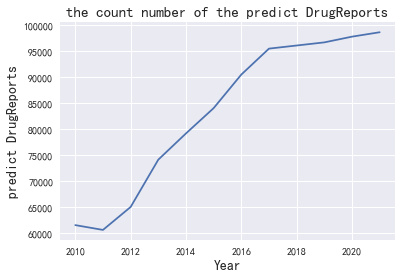

In [150]:
# 举个例子画图
from pyecharts import Geo, Map, Line
# 面积折线图
plt.plot(y,val)
plt.xlabel('Year',fontsize=14)
plt.ylabel('predict DrugReports',fontsize=14)
plt.title('the count number of the predict DrugReports',fontsize=15)
plt.show()